**Column Details:**
- **Booking_ID**: Unique identifier for each booking.
- **no_of_adults**: Number of adult guests in the booking.
- **no_of_children**: Number of child guests in the booking.
- **no_of_weekend_nights**: Nights stayed over the weekend.
- **no_of_week_nights**: Nights stayed during weekdays.
- **type_of_meal_plan**: Type of meal plan selected (if any).
- **required_car_parking_space**: Whether a car parking space was requested (1 = yes, 0 = no).
- **room_type_reserved**: Type of room reserved for the booking.
- **lead_time**: Number of days between booking and check-in date.
- **arrival_year**: Year of arrival.
- **arrival_month**: Month of arrival.
- **arrival_date**: Day of the month the guest is scheduled to arrive.
- **market_segment_type**: Source channel through which the booking was made.
- **repeated_guest**: Indicates if the guest has booked previously (1 = yes, 0 = no).
- **no_of_previous_cancellations**: Count of past cancellations made by the guest.
- **no_of_previous_bookings_not_canceled**: Number of prior bookings completed by the guest.
- **avg_price_per_room**: Average price per room per night.
- **no_of_special_requests**: Number of special service requests made.
- **booking_status**: Final status of the booking (Canceled or Not_Canceled).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0.0,0.0,0.0,65.00,0.0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [3]:
df.shape

(35212, 19)

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35212 entries, 0 to 35211
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            35212 non-null  object 
 1   no_of_adults                          35212 non-null  int64  
 2   no_of_children                        35212 non-null  int64  
 3   no_of_weekend_nights                  35212 non-null  int64  
 4   no_of_week_nights                     35212 non-null  int64  
 5   type_of_meal_plan                     35212 non-null  object 
 6   required_car_parking_space            35212 non-null  int64  
 7   room_type_reserved                    35212 non-null  object 
 8   lead_time                             35212 non-null  int64  
 9   arrival_year                          35212 non-null  int64  
 10  arrival_month                         35212 non-null  int64  
 11  arrival_date   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,35212.0,1.844116,0.519571,0.0,2.0,2.00,2.0,4.0
no_of_children,35212.0,0.105305,0.402822,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,35212.0,0.810008,0.870322,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,35212.0,2.204078,1.409239,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,35212.0,0.030899,0.173045,0.0,0.0,0.00,0.0,1.0
lead_time,35212.0,85.060349,85.834942,0.0,17.0,57.00,126.0,443.0
arrival_year,35212.0,2017.820374,0.383881,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,35212.0,7.423435,3.069465,1.0,5.0,8.00,10.0,12.0
arrival_date,35212.0,15.593122,8.737406,1.0,8.0,16.00,23.0,31.0
repeated_guest,35211.0,0.025816,0.158588,0.0,0.0,0.00,0.0,1.0


In [7]:
# Checking for missing values
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [8]:
# checking for any duplicate rows
print(df.duplicated().any())

False


In [9]:
# Let's separate categorical and numerical columns
col = df.dtypes == 'object'
obj_cols = (col[col] == True).index
col = df.dtypes != 'object'
num_cols = (col[col] == True).index
print("Categorical columns are: ", list(obj_cols))
print("Numerical columns are: ", list(num_cols))

Categorical columns are:  ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numerical columns are:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [10]:
# Let's find all the unique values of all the categorical columns
for col in obj_cols:
  print(f'{col} : {df[col].unique()} : {len(df[col].unique())}')

Booking_ID : ['INN00001' 'INN00002' 'INN00003' ... 'INN35210' 'INN35211' 'INN35212'] : 35212
type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] : 4
room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] : 7
market_segment_type : ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary' 'Of'] : 6
booking_status : ['Not_Canceled' 'Canceled' nan] : 3


* From above we can say that Booking_ID is hardly of any use, we can consider removing it
* Other columns also gives us a solid understanding of what kind of data we are expecting to work with.
* We have 3 types of meal plan and one "Non Selected" option
* We have a diverse selection of rooms through 1 to 7
* We can also separate the customers based on market segments like Online, Offline, Corporate, Aciationm and Complementary
* At last our target column booking status: cancelled/not cancelled

In [11]:
# Removing Booking_ID col
df.drop('Booking_ID', axis=1, inplace=True)

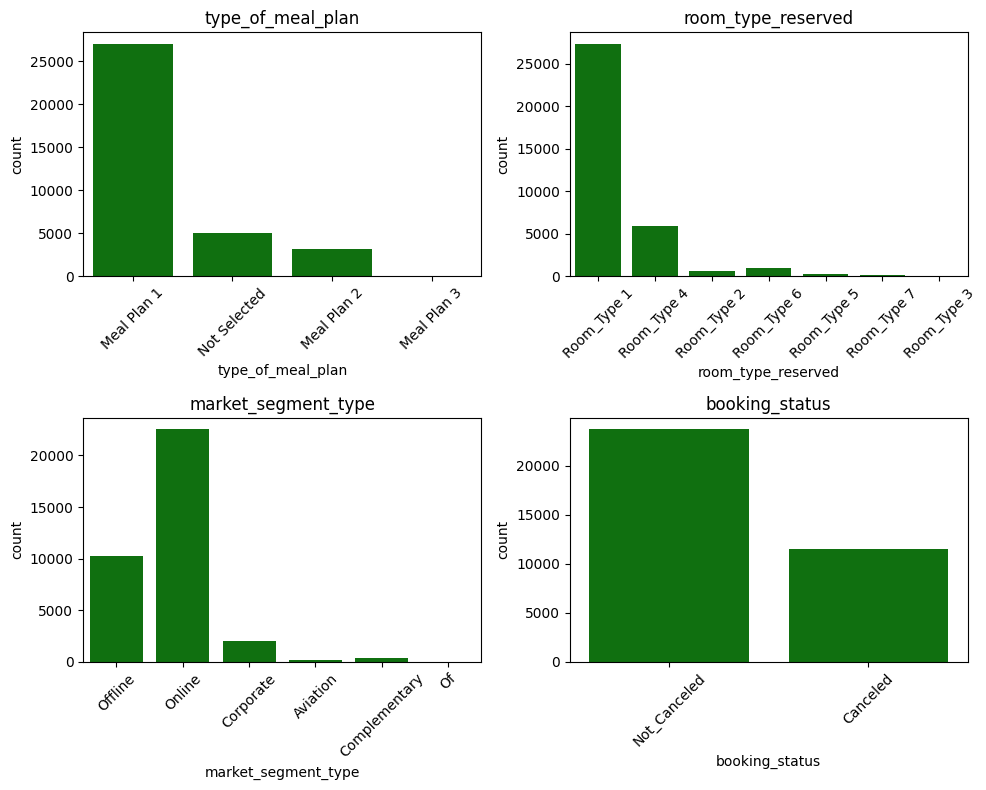

In [12]:
# Let's find count plot of all the categorical columns
plt.figure(figsize=(10,8))
index=0
for col in obj_cols[1:]:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(x=df[col], color='Green')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Based on above plots we can say:**
* Their most ordered meal plan is Mean Plan 1
* Their most reserved room type is Room Type 1
* Most of their bookings comes under online market segment
* More than half of their customers do not cancel the reservation which can be a good or bad thing depending on the situations.

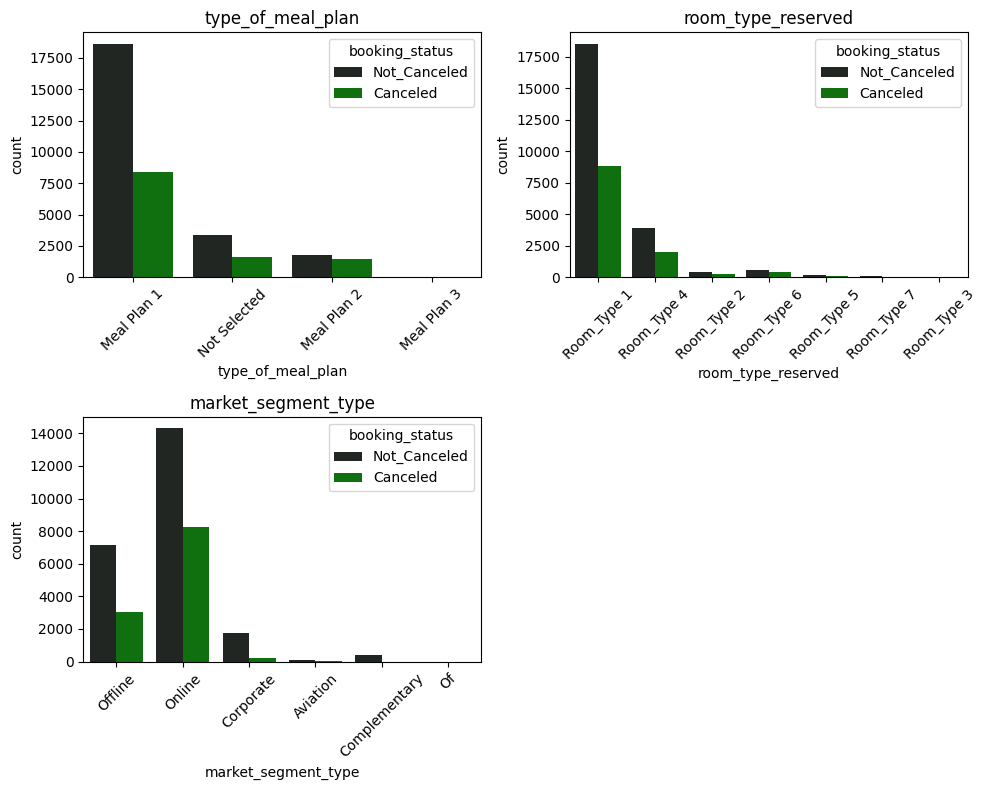

In [13]:
# Let's find count plot of all the categorical columns vs Target column
plt.figure(figsize=(10,8))
index=0
for col in obj_cols[1:4]:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(x=df[col], hue = df["booking_status"], color='Green')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This view gives us an interesting perspective of booking_status for the categorical columns.
* We do have decent amount of bookings getting cancelled but throughout it doesn't seem like it would point to a particular reason for cancellation.

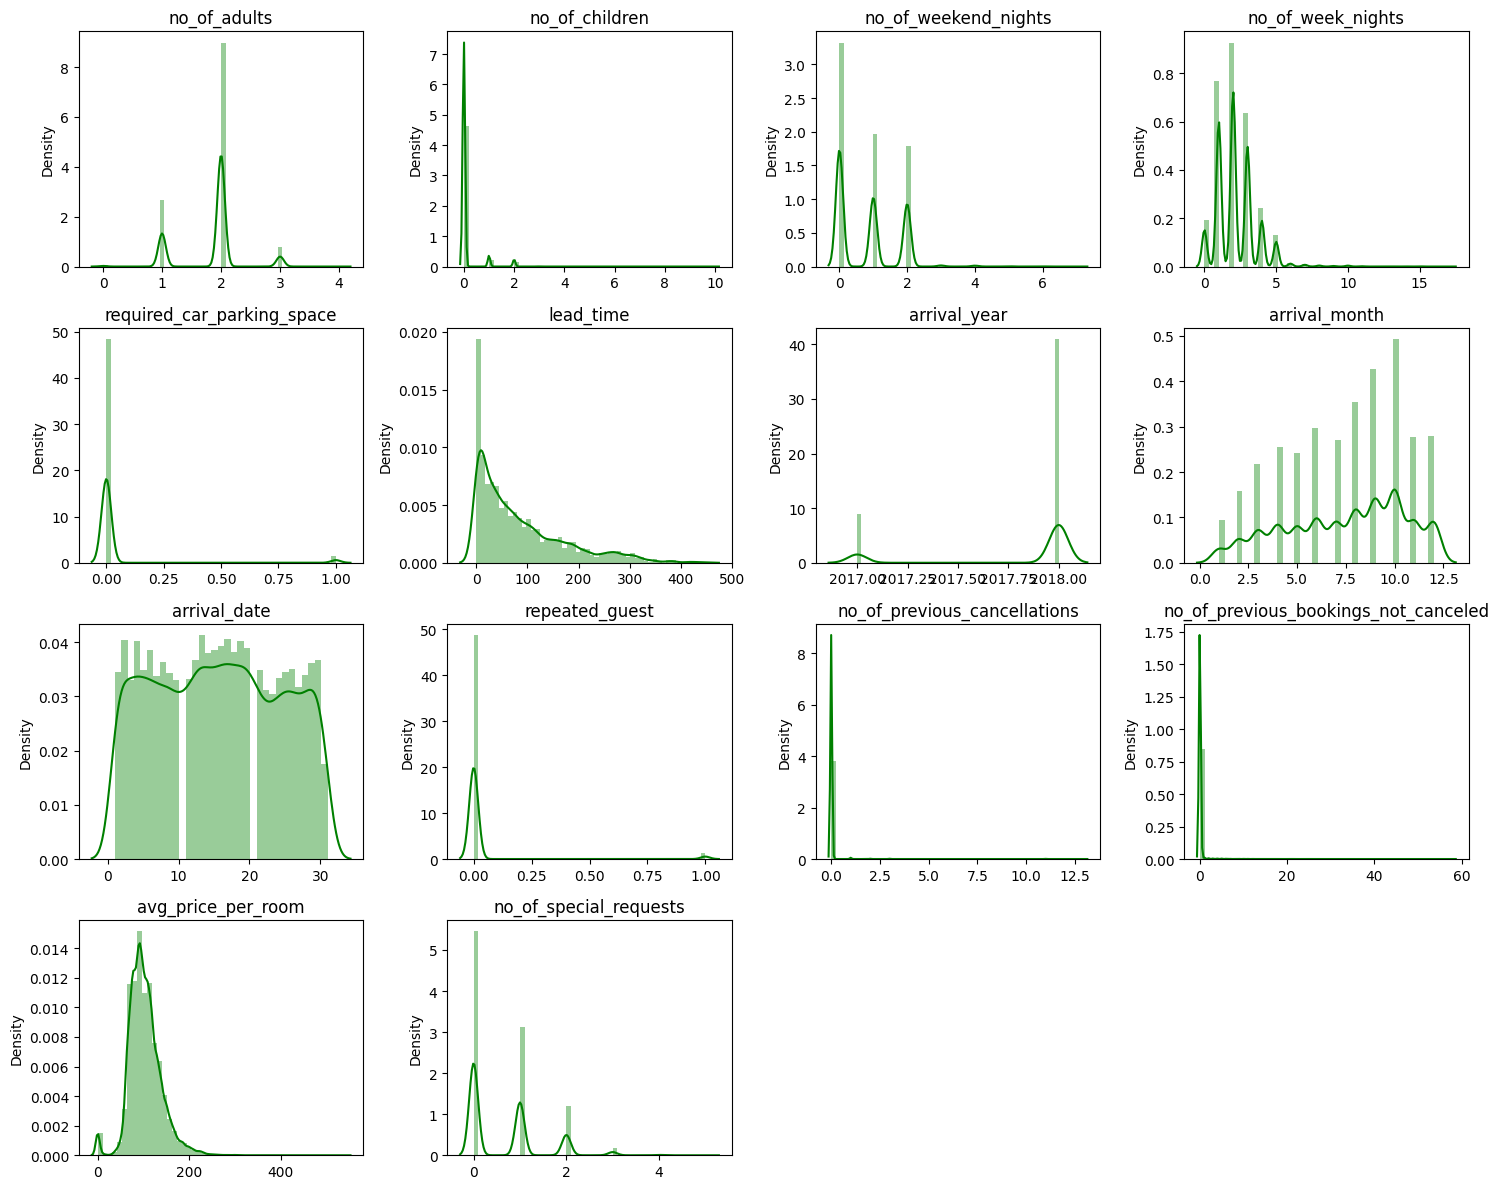

In [14]:
plt.figure(figsize=(15,12))
index=0
for col in num_cols:
    index += 1
    plt.subplot(4, 4, index)
    sns.distplot(x=df[col], color='Green')
    plt.title(col)
plt.tight_layout()
plt.show()

**Based on above density plots for all the numerical values, we can say that**
* Most of the columns appears to be Right skewed.
* Only arrival_date appears to be Normally Distributed.
* Judging from first 2 plots we can speculate, 2 adults and no children is most choosen record in their hotel.
* We are having people booking throughout the week,
* Most of the customers do not require parking space apparently.
* The plot says most of the booking are done in the beginning of the year.
* Where as arrival_month suggest there is steady flow of customers all over the year.
* There are hardly any repeated guests so maybe they are not liking our servives, we can take feedback learn where we are lacking and why would they not consider coming to our hotel again.
* We do get special requests, but many don't ask for that which is a good sign.
* Average price per room seems to be quite reasonable, it also implies that room_type_1 is the most sold.

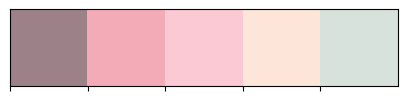

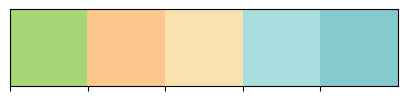

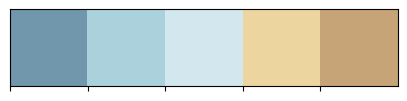

In [15]:
colors_peach =['#9D8189', '#F3ABB7', '#FAC9D4','#FEE5D9' ,'#D8E2DC']
colors_mix = ['#A7D676', '#FBC78D', '#F9E2AE','#A8DEE0','#85CBCC']
colors_sandy = ['#7097AB', '#ABD1DC' ,'#D3E7EE','#ECD59F', '#C6A477']

sns.palplot(colors_peach)
sns.palplot(colors_mix)
sns.palplot(colors_sandy)

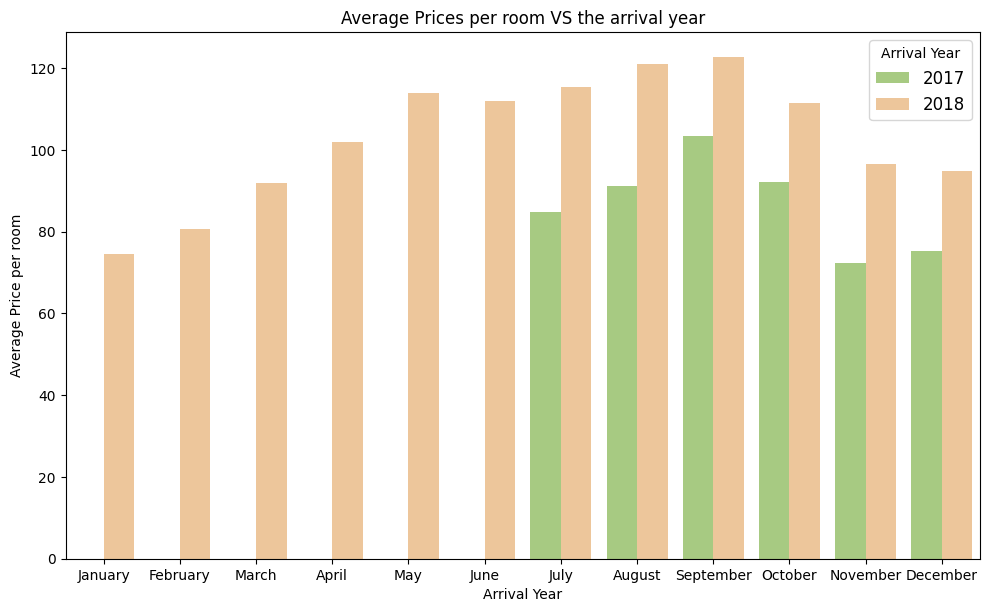

In [16]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data = df, x = 'arrival_month', y='avg_price_per_room', hue='arrival_year', palette=colors_mix, errorbar=None) #Plot to compare against the years

plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] ,labels=['January','February','March', 'April' , 'May' ,'June' ,'July', 'August', 'September', 'October', 'November', 'December'])

ax.set_xlabel('Arrival Year')
ax.set_ylabel('Average Price per room')
ax.set_title('Average Prices per room VS the arrival year')
ax.legend(title="Arrival Year", loc="upper right", fontsize=12)
plt.show()

* We can observe a steady increase in average room price from jan to september in the year 2018 but also decrease towards the end of year during winter.
* We can also gague out that trend follows for the year 2017 as well.

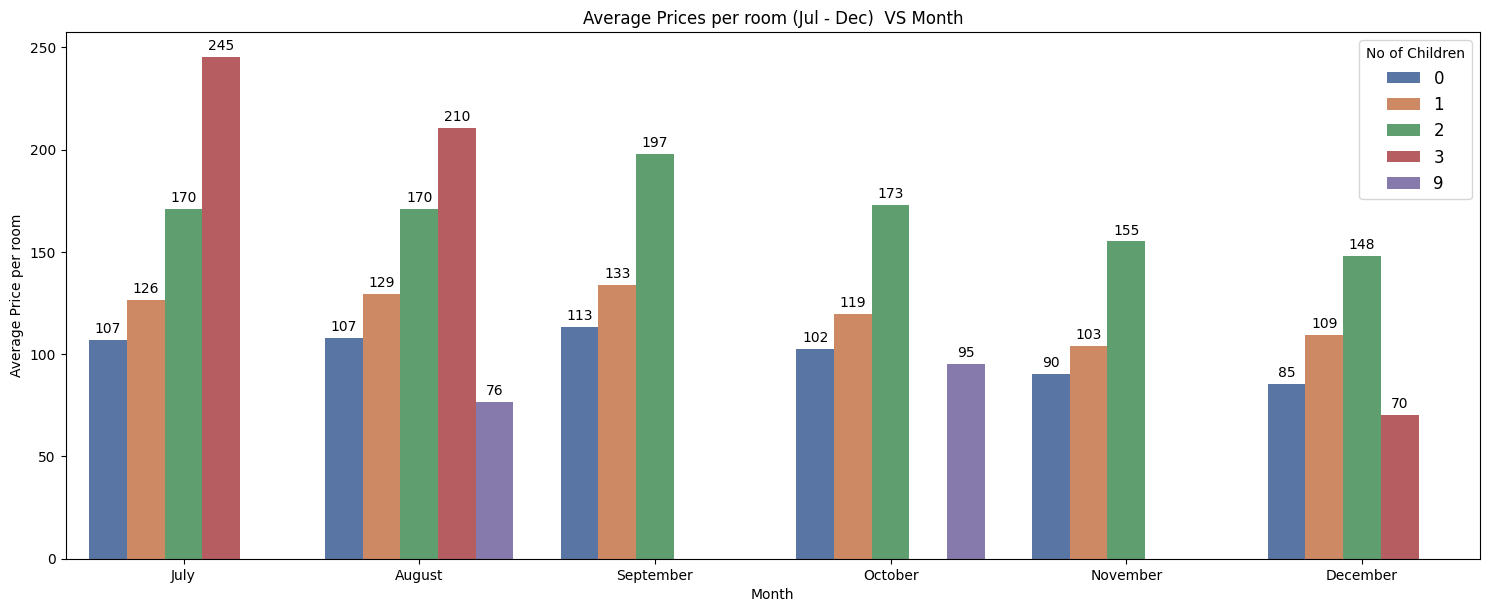

In [17]:
plt.figure(figsize=(15,6))


df_months_comparison = df[df['arrival_month'].between(7, 12)] #The data of 2017 started from July to December, so this will be used to compare only against 2018 instead of the entire year of 2018

ax = sns.barplot(data =df_months_comparison, x = 'arrival_month', y='avg_price_per_room', hue='no_of_children' ,palette='deep', errorbar=None)


for container in ax.containers:
    ax.bar_label(
        container,
        label_type='edge',
        fontsize=10,
        padding=3,
        labels=[str(int(value)) if not np.isnan(value) else '0' for value in container.datavalues]
    )

plt.tight_layout()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xlabel('Month')
ax.set_ylabel('Average Price per room')
ax.set_title('Average Prices per room (Jul - Dec)  VS Month')
ax.legend(title="No of Children", loc="upper right", fontsize=12)
plt.show()

* We can observe here the number of children that comes here with their parents are mostly numbered from 0-3 although we can see a number 9 in 2 specific months Aug and Oct but this is probably an outlier
* We can also observe here the average price per room increases as the number of children increases which is to be expected for better maintenance.


In [18]:
df['monthly_sales'] = df['arrival_month'] * df['avg_price_per_room']

df_monthly_sales = df.groupby('arrival_month')['monthly_sales'].sum().reset_index()

print(df_monthly_sales)

    arrival_month  monthly_sales
0               1       73760.98
1               2      266586.42
2               3      629567.22
3               4     1085772.36
4               5     1435956.65
5               6     2093809.98
6               7     2209153.45
7               8     3352925.76
8               9     4657630.77
9              10     5400926.60
10             11     2910085.09
11             12     3120489.72


<Axes: >

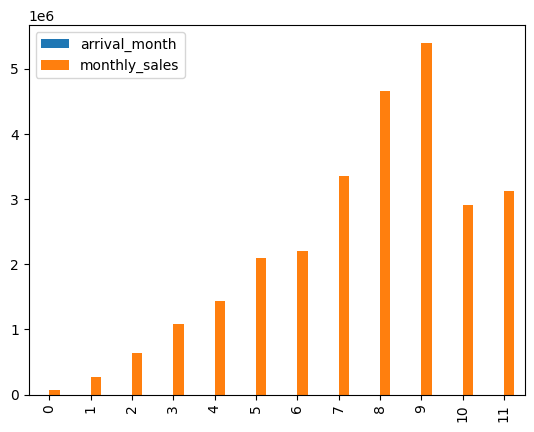

In [19]:
df_monthly_sales.plot(kind='bar')

From this it is clear that the month october generates the most amount of revenue than any other month, which we got before but now it is confirmed.

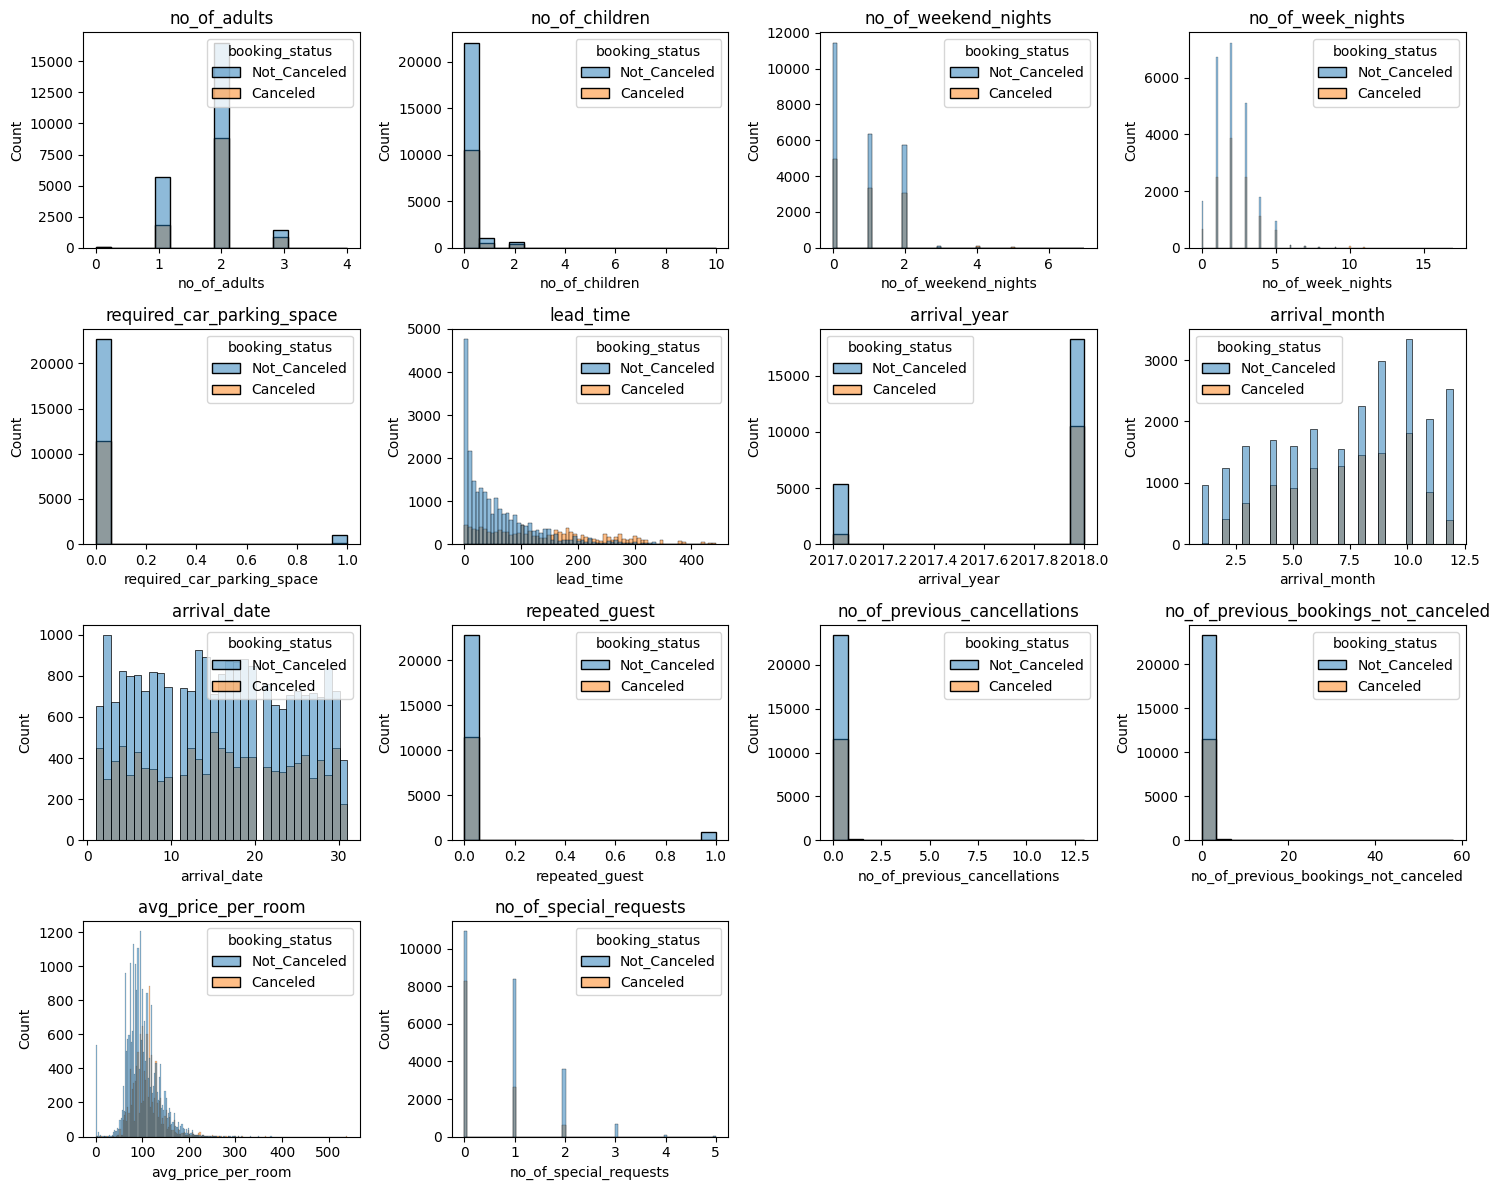

In [20]:
plt.figure(figsize=(15,12))
index=0
for col in num_cols:
    index += 1
    plt.subplot(4, 4, index)
    sns.histplot(x=df[col], hue=df["booking_status"])
    plt.title(col)
plt.tight_layout()
plt.show()

From all these histplots, we can say that there isn't any particular reason why there might be cancellation for booking.

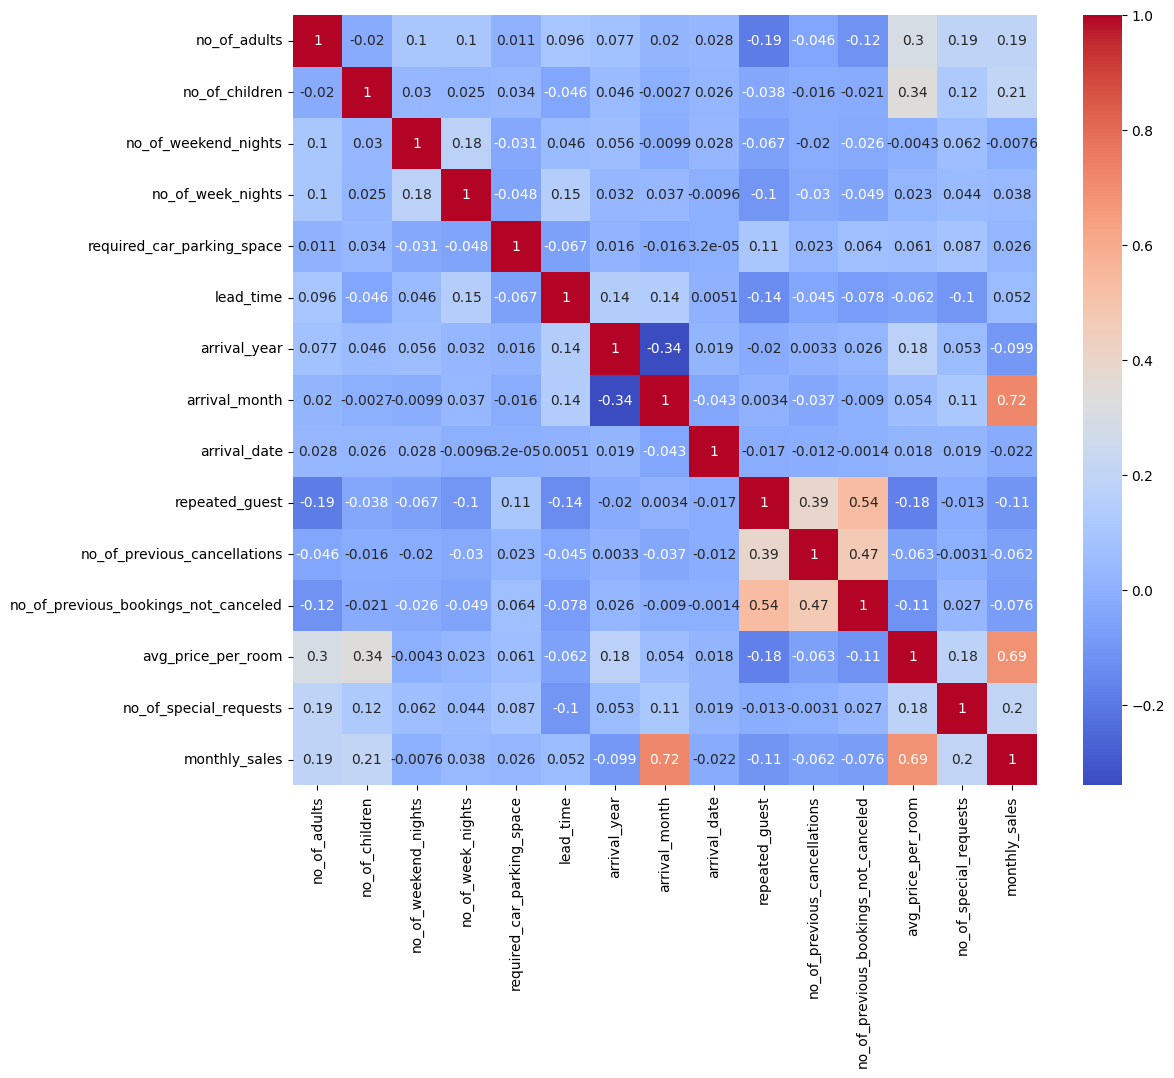

In [21]:
# Let's check for correlation matrix for numerical columns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm');
plt.show()

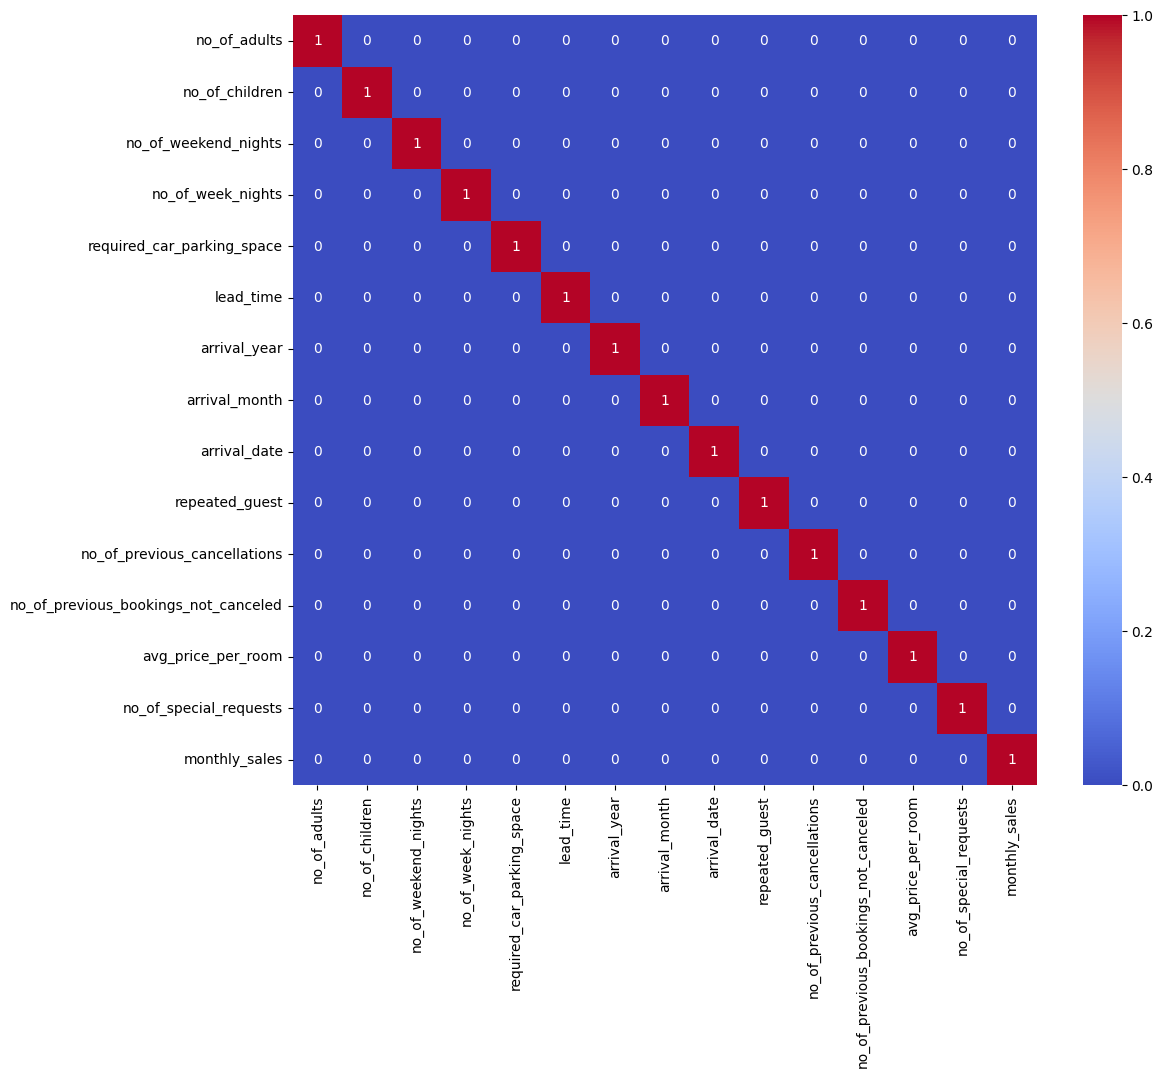

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True)>0.8, annot=True, cmap='coolwarm');
plt.show()

* We can see none of the columns seems to be highly correlated we can move ahead considering all the columns for model building and based on performance we can reduce the number of features later.

In [23]:
# Let's check for outliers
def outlier_detection(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outliers = df[(df[col]<lower) | (df[col]>upper)]
    return outliers

outlier_summary = {}
for col in num_cols:
    outliers = outlier_detection(df, col)
    outlier_summary[col] = len(outliers)

print("Total Number of outlers: ", sum(outlier_summary.values()),"\n")
outlier_summary

Total Number of outlers:  25993 



{'no_of_adults': 9902,
 'no_of_children': 2621,
 'no_of_weekend_nights': 20,
 'no_of_week_nights': 311,
 'required_car_parking_space': 1088,
 'lead_time': 1288,
 'arrival_year': 6325,
 'arrival_month': 0,
 'arrival_date': 0,
 'repeated_guest': 909,
 'no_of_previous_cancellations': 332,
 'no_of_previous_bookings_not_canceled': 792,
 'avg_price_per_room': 1656,
 'no_of_special_requests': 749}

In [24]:
def remove_outliers(df, columns):
    df_filtered = df.copy()
    mask = pd.Series([True] * len(df_filtered), index=df_filtered.index)

    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Combine with existing mask
        mask &= df_filtered[col].between(lower_bound, upper_bound)

    return df_filtered[mask]

print("Dataset size before removing outliers:", df.shape)
df = remove_outliers(df, num_cols)
print("Dataset size after removing outliers:", df.shape)

Dataset size before removing outliers: (35212, 19)
Dataset size after removing outliers: (16220, 19)


In [25]:
# Converting categorical data to numerical data
# Note: We won't be making use of Booking_ID column since it basically contains
# all unique value which won't be helpful for the model's learning
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in obj_cols[1:]:
    df[col] = le.fit_transform(df[col])
    print(f"Classes of {col} : {le.classes_}")
    print()

Classes of type_of_meal_plan : ['Meal Plan 1' 'Meal Plan 2' 'Not Selected']

Classes of room_type_reserved : ['Room_Type 1' 'Room_Type 2' 'Room_Type 3' 'Room_Type 4' 'Room_Type 5'
 'Room_Type 6' 'Room_Type 7']

Classes of market_segment_type : ['Aviation' 'Complementary' 'Corporate' 'Offline' 'Online']

Classes of booking_status : ['Canceled' 'Not_Canceled']



In [26]:
# Feature Selection
x = df.drop(["booking_status"], axis=1)
y = df['booking_status']
x.shape, y.shape

((16220, 18), (16220,))

* We have a lot of data to work with.
* Here we'll be taking 18 features as parameters and "booking_id" as target variable.

In [27]:
# Now let's separate the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((12976, 18), (3244, 18), (12976,), (3244,))

In [28]:
# Let's scale the features for faster learning
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), SVC(kernel="poly"), RandomForestClassifier(), XGBClassifier()]
# model = []
for model in models:
    model = model.fit(x_train_scaled, y_train)
    print(model.__class__.__name__)
    print("Training Accuracy:", accuracy_score(y_train, model.predict(x_train_scaled)))
    print("Testing Accuracy:", accuracy_score(y_test, model.predict(x_test_scaled)))
    print()

LogisticRegression
Training Accuracy: 0.7928483353884094
Testing Accuracy: 0.7854500616522812

SVC
Training Accuracy: 0.8163532675709001
Testing Accuracy: 0.8020961775585697

RandomForestClassifier
Training Accuracy: 0.9959155363748459
Testing Accuracy: 0.8665228113440198

XGBClassifier
Training Accuracy: 0.9368834771886559
Testing Accuracy: 0.8572749691738595



Random Forest Classifier appears to perform the best as of now, although we can see the model is overfitting let's see if we can do something about that.

In [30]:
importance=models[2].feature_importances_
features = x.columns
feature_importance_df = pd.DataFrame({"Importance":importance,
                                      "features":features}).sort_values(by="Importance", ascending=False)

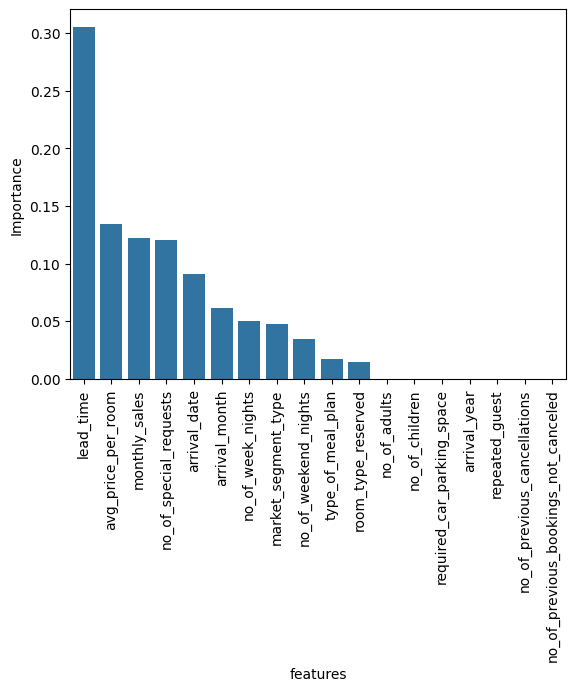

In [31]:
sns.barplot(x="features", y="Importance", data=feature_importance_df)
plt.xticks(rotation=90)
plt.show()

Here let's try to ignore the last 7 columns since they are hardly useful.

In [32]:
# creating the list of best features
features_df = feature_importance_df.head(11)
best_features_list = list(features_df['features'])
best_features_list

['lead_time',
 'avg_price_per_room',
 'monthly_sales',
 'no_of_special_requests',
 'arrival_date',
 'arrival_month',
 'no_of_week_nights',
 'market_segment_type',
 'no_of_weekend_nights',
 'type_of_meal_plan',
 'room_type_reserved']

In [33]:
# Selecting Only the best features
x = df[best_features_list]
y = df['booking_status']
x.shape, y.shape

((16220, 11), (16220,))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12976, 11), (3244, 11), (12976,), (3244,))

In [35]:
# Scaling the new features
scaler_2 = StandardScaler()
x_train_scaled = scaler_2.fit_transform(x_train)
x_test_scaled = scaler_2.transform(x_test)

In [36]:
# Model fitting and deciding on the best model
models = [LogisticRegression(), SVC(kernel="linear"), RandomForestClassifier(), XGBClassifier()]
# model = []
for model in models:
    model = model.fit(x_train_scaled, y_train)
    print(model.__class__.__name__)
    print("Training Accuracy:", accuracy_score(y_train, model.predict(x_train_scaled)))
    print("Testing Accuracy:", accuracy_score(y_test, model.predict(x_test_scaled)))
    print()

LogisticRegression
Training Accuracy: 0.7928483353884094
Testing Accuracy: 0.7854500616522812

SVC
Training Accuracy: 0.7883014796547472
Testing Accuracy: 0.7848335388409371

RandomForestClassifier
Training Accuracy: 0.9959926017262639
Testing Accuracy: 0.8631319358816276

XGBClassifier
Training Accuracy: 0.9338779284833539
Testing Accuracy: 0.8569667077681874



Good news is Random Forest is able to generalize the training set perfectly but it is falling short for testing data meaning the model is over generalizing the test data hence our model is bit Overfitting, so we'll be trying to fix that with the help of hyperparameter tuning.

In [ ]:
# Hyperparameter tuning using RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [800, 1000],
    'max_depth': [5, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='accuracy', verbose=1,
                                   random_state=42, n_jobs=-1)

random_search.fit(x_train_scaled, y_train)
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
